# Deep Learning Fundamentals Course - Final Project - 2024

## Objective: Classification of Chest X-ray images

## Dataset for training: Kaggle Chest X-ray Pneumonia Dataset
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

### By: Asaf Mesilaty

### Link to my google drive directory:
https://drive.google.com/drive/u/0/folders/1R6j17-P6VDIPPblCDMnIIzmbSeVfEVYz

### Link to the test notebook:
https://colab.research.google.com/drive/1XazTtDXjTFICVZboto9KfUJZKTBRPdj3?usp=drive_link


This dataset contains 5,863 X-ray images divided into two main categories:
1. Healthy
2. With pneumonia (further divided into bacterial and viral pneumonia, which can
be inferred from the image name).


The dataset is divided into training, validation, and test datasets.  
Keep the test set as is.
You may combine the training and validation sets and redistribute them differently.


This project is designed to reflect the knowledge you've gained during the
course.  
For different tasks, use and consider the factors discussed during the course,
such as learning rate, optimizers, transfer learning, network architectures, loss functions, etc.   
Do not use tools that were not covered in the course.

Technical Instructions:  
* The neural network should be built using only the Keras library.   
For the rest of the project, you can use helper libraries like NumPy, Pandas, Seaborn, scikit-learn, Matplotlib, etc.  
* Save the trained weights of the "winning architecture" and set up a test
environment for each task. The test notebook should allow loading the trained
weights/model and give the user the option to upload new input for classification (according to the different tasks).  
* Provide clear instructions on how to run the notebooks you've attached.




---



## Note: Instead of using transfer learning with giant pre-trained models or building one myself, I'm going to focus on getting good results with a smaller network. This will allow me to showcase the different techniques we learned in the course!

---



### This is an assignment where you'll learn to code by solving tasks. We'll answer each question by explaining it first, then writing the code.

---


## Task 1 - Solve the following problems using deep neural networks:  
### a. Classification of healthy/sick.  
### b. Classification of healthy/bacterial pneumonia/viral pneumonia (a network with three outputs, not hierarchical).  

### Insturctions:
1. Make a new folder in your Google Drive called "DeepLearning".
2. Click the link above to download all the files you'll need.
3. Once the files are downloaded, move them into the "DeepLearning" folder you created.

your directory should look like that:
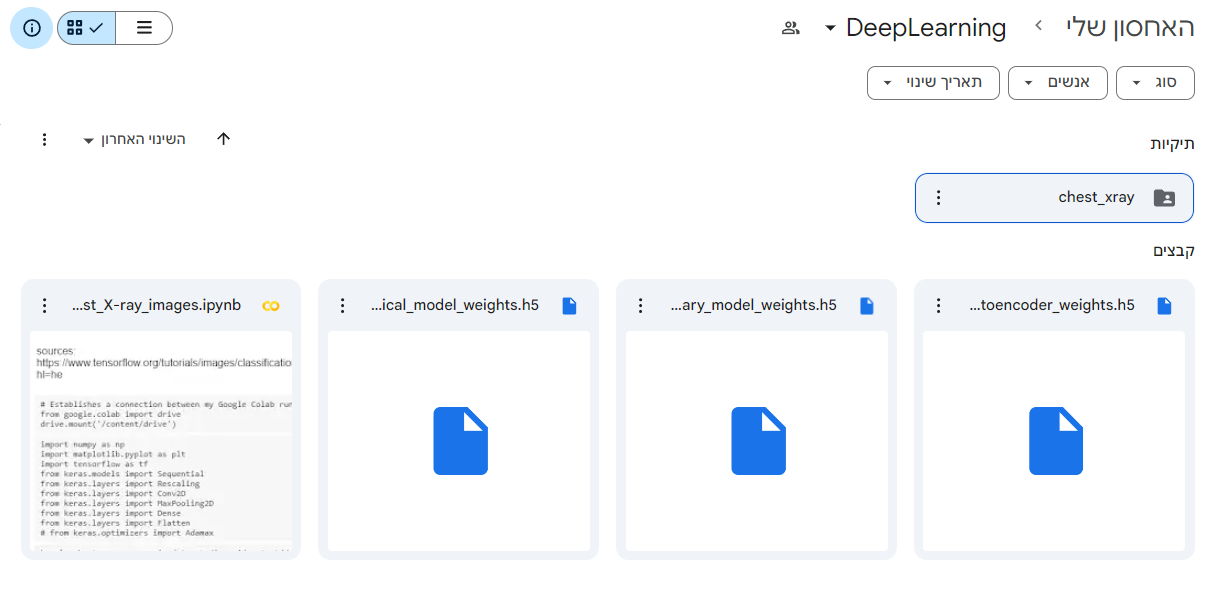

### Establishes a connection between Google Colab runtime and your Google Drive:


In [ ]:
# Establishes a connection between my Google Colab runtime and my Google Drive.
from google.colab import drive
drive.mount('/content/drive')

import os
base_dir = '/content/drive/MyDrive/DeepLearning/chest_xray/'
train_dir = os.path.join(base_dir, 'train/')
val_dir = os.path.join(base_dir, 'val/')
test_dir = os.path.join(base_dir, 'test/')

Mounted at /content/drive


### These imports help us visualize data, build models, and explain them:

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, UpSampling2D, Input, Add
from keras.optimizers import Adam

In [ ]:
# Constants:
BINARY = 'binary'
CATEGORICAL = 'categorical'

### Setting parameters for the model:

In [ ]:
batch_size = 16
img_height, img_width = 152, 152
img_shape = (img_height, img_width, 1)
color_mode = 'grayscale'
class_mode = BINARY

### Define our data generators:

#### Instead of using the images exactly as they are, I'm making some small changes to them. This is done with a tool called ImageDataGenerator.  By adding a little rotation, flipping the images sometimes, and slightly shifting them, the model will see a wider variety of data.  This helps the model learn better and avoid being biased towards any specific way the images might look.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  horizontal_flip=True,
                                  width_shift_range=0.08,
                                  height_shift_range=0.08)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

def define_data():

  def get_data(datagen, data_dir):
    data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    color_mode=color_mode,
    class_mode=class_mode,
    batch_size=batch_size,
    seed = 12
    )
    return data

  train_data = get_data(train_datagen, train_dir)
  val_data = get_data(val_datagen, val_dir)
  test_data = get_data(test_datagen, test_dir)

  return train_data, val_data, test_data

In [ ]:
train_data, val_data, test_data = define_data()

Found 5200 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Found 592 images belonging to 2 classes.


### Make sure the shapes matches our preferences

In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 152, 152, 1)
(16,)


### Define classes:
#### The index of a class is the id of the class

In [ ]:
def get_classes(model_type):
  if model_type == BINARY:
    return ['NORMAL', 'PNEUMONIA']
  elif model_type == CATEGORICAL:
    return ['NORMAL', 'VIRUS', 'BACTERIA']
  else:
    raise ValueError('Unsupported class mode: {}'.format(model_type))

# Visulize a batch from the training set.

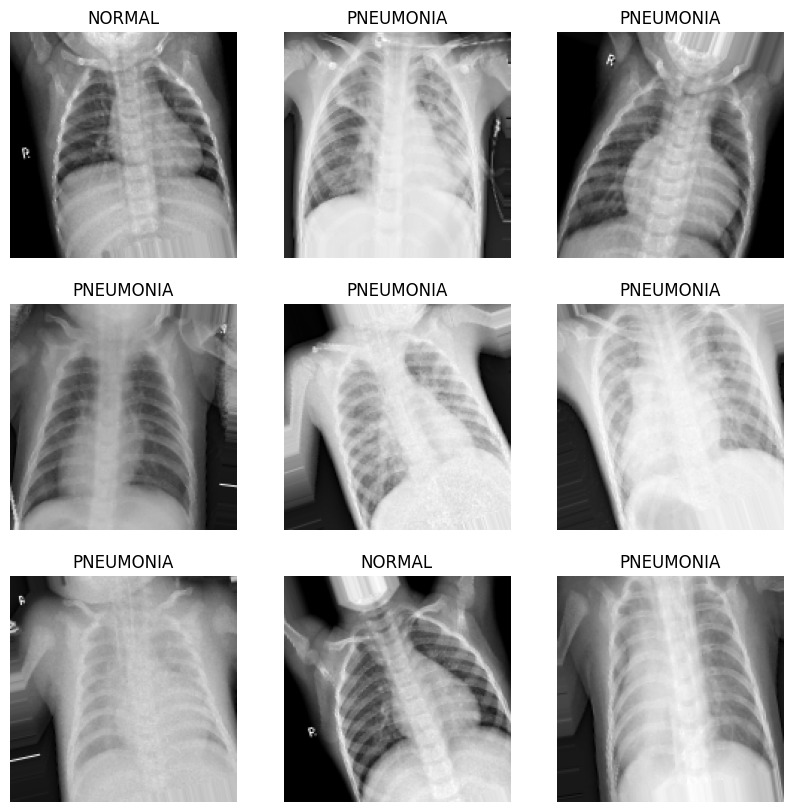

In [ ]:
classes = get_classes(class_mode)

plt.figure(figsize=(10, 10))
for images, labels in train_data:
  for i in range(min(9, batch_size)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(classes[int(labels[i])])
    plt.axis("off")
  break

### Let's examine the distribution of data among the different classifications:


In [ ]:
def plot_distribution(set_type, set_title):
  print(set_title, "Set:")
  classes = get_classes(class_mode)
  class_counts = {}

  for class_name in classes:
    # Construct the full path to the class directory:
    class_dir = os.path.join(base_dir, set_type, class_name)
    count = len(os.listdir(class_dir))
    class_counts[class_name] = count

    print(class_name, ":", count)

  # Plotting
  plt.bar(class_counts.keys(), class_counts.values())
  plt.xlabel("Class")
  plt.ylabel("Number of Images")
  plt.title(f"Class Distribution in {set_title} Set")
  plt.tight_layout()
  plt.show()

Validation Set:
NORMAL : 32
PNEUMONIA : 32


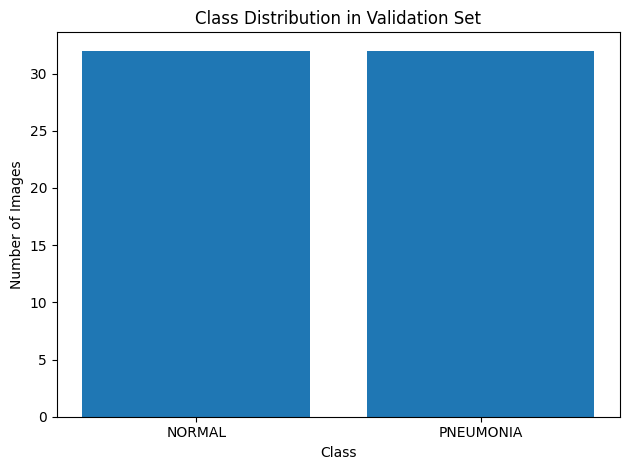


Test Set:
NORMAL : 218
PNEUMONIA : 374


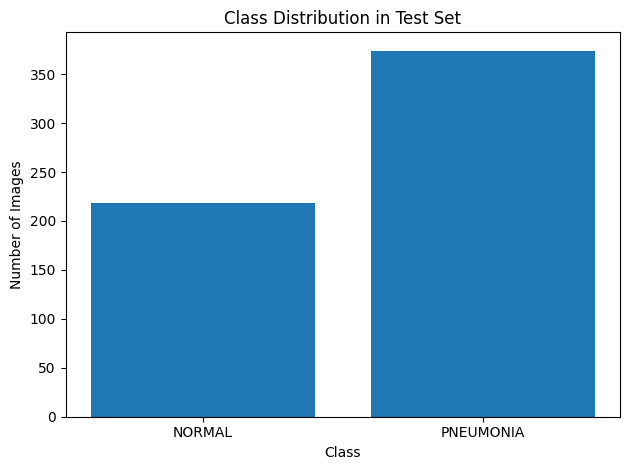


Train Set:
NORMAL : 1333
PNEUMONIA : 3867


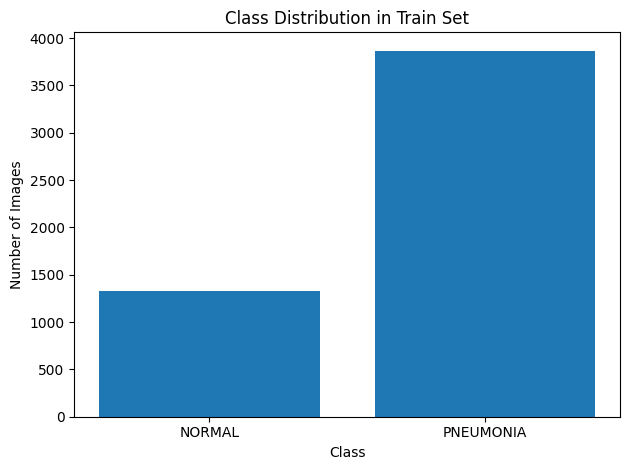

In [ ]:
plot_distribution('val', 'Validation')
print("")
plot_distribution('test', 'Test')
print("")
plot_distribution('train', 'Train')

## Task 1a: Classification of healthy/sick.  

In [ ]:
binary_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=img_shape),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu', input_shape=img_shape),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

binary_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
binary_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 64)        1

### Load the weights from the saved file:
* the weights were created throw various fit runs.

In [ ]:
binary_model.load_weights('/content/drive/MyDrive/DeepLearning/binary_model_weights.h5')

In [ ]:
binary_history = binary_model.fit(
  train_data,
  validation_data=val_data,
  epochs=3
)

Epoch 1/3
325/325 [==============================] - 929s 3s/step - loss: 0.1609 - accuracy: 0.9400 - val_loss: 0.2789 - val_accuracy: 0.8594
Epoch 2/3
325/325 [==============================] - 283s 867ms/step - loss: 0.1340 - accuracy: 0.9529 - val_loss: 0.3616 - val_accuracy: 0.8594
Epoch 3/3
325/325 [==============================] - 289s 888ms/step - loss: 0.1285 - accuracy: 0.9523 - val_loss: 0.4164 - val_accuracy: 0.7969


#### The model was trained with only 3 epochs per run due to limited resources. While the training history with 3 epochs might not be very informative, you can plot the loss curve for further analysis using the following code:
```
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
```






In [ ]:
binary_model.evaluate(test_data)

37/37 [==============================] - 10s 270ms/step - loss: 0.5627 - accuracy: 0.8497


[0.5627030730247498, 0.849662184715271]

### Save the trained model weights for the binary classification model:
If you continue training the model, you have the option to save the updated weights. However, it's advisable to avoid saving these weights if you observe signs of overfitting.

In [ ]:
binary_model.save_weights('/content/drive/MyDrive/DeepLearning/binary_model_weights.h5')

### To categorize the data, we will divide each 'PNEUMONIA' directory into separate directories for VIRUS and BACTERIA. Subsequently, the data will be reloaded to reflect this organization.

In [ ]:
# Create VIRUS and BACTERIA directories from PNEUMONIA directory.
def seperate_virus_bacteria(source_folder):
  pneumonia_dir = os.path.join(source_folder, 'PNEUMONIA')
  if not os.path.exists(pneumonia_dir):
    print("PNEUMONIA directory does not exists - can't split")
    return

  virus_dir = os.path.join(source_folder, 'VIRUS')
  bacteria_dir = os.path.join(source_folder, 'BACTERIA')
  os.makedirs(virus_dir)
  os.makedirs(bacteria_dir)

  for filename in os.listdir(pneumonia_dir):
    category = filename.split("_")[1]
    dst_dir = virus_dir if category == "virus" else bacteria_dir
    src_path = os.path.join(pneumonia_dir, filename)
    dst_path = os.path.join(dst_dir, filename)
    os.rename(src_path, dst_path)

  os.rmdir(pneumonia_dir)
  print("Files seperated successfully!")

seperate_virus_bacteria(train_dir)
seperate_virus_bacteria(val_dir)
seperate_virus_bacteria(test_dir)
class_mode = 'categorical'
train_data, val_data, test_data = define_data()

Files seperated successfully!
Files seperated successfully!
Files seperated successfully!
Found 5200 images belonging to 3 classes.
Found 64 images belonging to 3 classes.
Found 592 images belonging to 3 classes.


Validation Set:
NORMAL : 32
VIRUS : 9
BACTERIA : 23


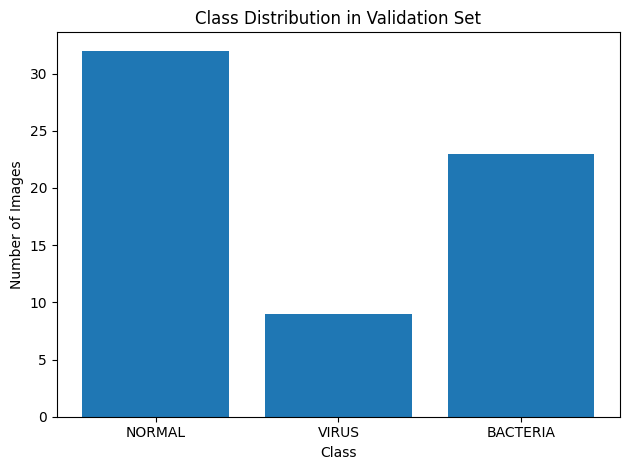


Test Set:
NORMAL : 218
VIRUS : 147
BACTERIA : 227


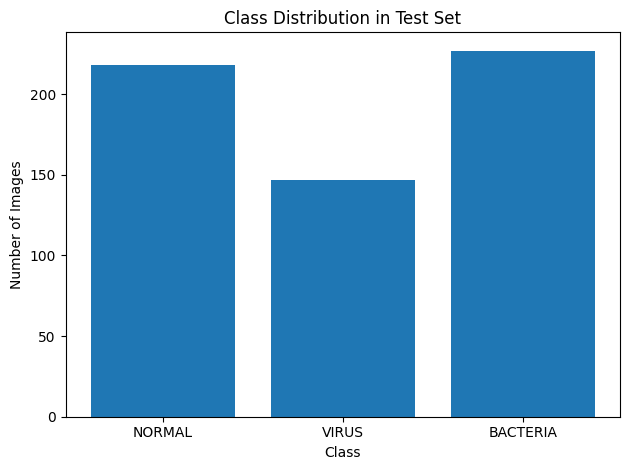


Train Set:
NORMAL : 1333
VIRUS : 1337
BACTERIA : 2530


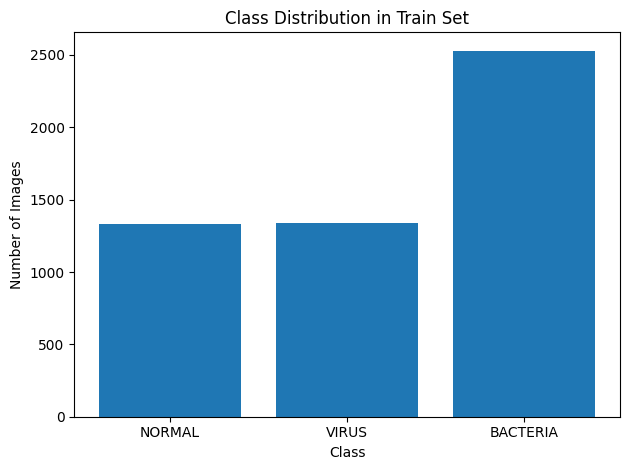

In [ ]:
plot_distribution('val', 'Validation')
print("")
plot_distribution('test', 'Test')
print("")
plot_distribution('train', 'Train')

## Task 1b: Classification of healthy/bacterial pneumonia/viral pneumonia.

#### Rather than constructing the categorical model from the ground up in a similar manner to the binary classification model, we can leverage transfer learning. This approach involves utilizing the weights learned by the binary model as a starting point for the categorical model.

We could make the base model weights freeze, using the following code:
```
for layer in base_model.layers:
    layer.trainable = False
```
Freezing the layers means they will be untrainable and as a consequnce make the learning much faster.  
We will not do so because the features learnt by our binary model are not optimal for the categorical model.

In [ ]:
base_model = Sequential(binary_model.layers[:-4])

categorical_model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')
])

categorical_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
categorical_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 17, 17, 64)        25616     
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                200768    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

### Load the weights from the saved file:

In [ ]:
categorical_model.load_weights('/content/drive/MyDrive/DeepLearning/categorical_model_weights.h5')

In [ ]:
categorical_history = categorical_model.fit(
  train_data,
  validation_data=val_data,
  epochs=3
)

Epoch 1/3
325/325 [==============================] - 316s 967ms/step - loss: 0.6969 - accuracy: 0.6794 - val_loss: 0.8181 - val_accuracy: 0.6250
Epoch 2/3
325/325 [==============================] - 265s 814ms/step - loss: 0.5907 - accuracy: 0.7394 - val_loss: 0.6258 - val_accuracy: 0.6875
Epoch 3/3
325/325 [==============================] - 268s 823ms/step - loss: 0.5663 - accuracy: 0.7494 - val_loss: 0.5562 - val_accuracy: 0.7500


In [ ]:
categorical_model.evaluate(test_data)

37/37 [==============================] - 9s 239ms/step - loss: 0.6835 - accuracy: 0.7652


[0.6834604144096375, 0.7652027010917664]

### Save the trained model weights for the categorical classification model:

In [ ]:
categorical_model.save_weights('/content/drive/MyDrive/DeepLearning/categorical_model_weights.h5')



---



## Task 2:

### After selecting a successful network from the previous tasks, demonstrate how to classify a new image using the embedding vector created from the classification network and KNN.

### Visualize the different classes using t-SNE (you may use a ready-made t-SNE library).

### relevant import for task 2:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

#### I will Visualize both of the netwroks using T-SNE for extra credit:

### We will start with the categorical model:

### In order to extract embeddings and lables in a clean and efficient way I will override the predict such that it will return predict(x), y.

In [ ]:
class EmbeddingModel(Model):
    def predict_step(self, data):
        x, y = data
        return self(x, training=False), y

### Extract embedding model from the trained categorical model:
#### We take the Dense layer before Dropout

In [ ]:
embedding_layer = categorical_model.layers[-2]
embedding_model = EmbeddingModel(inputs=categorical_model.input, outputs=embedding_layer.output)

### Get the training data for the KNN model:

In [ ]:
train_embeddings, train_labels = embedding_model.predict(train_data)
test_embeddings, test_labels = embedding_model.predict(test_data)

37/37 [==============================] - 14s 388ms/step


### Training KNN classifier on embeddings:

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_embeddings, train_labels)

KNeighborsClassifier()

### Evaluate KNN classifier on test embeddings

In [ ]:
test_predictions = knn_classifier.predict(test_embeddings)
knn_accuracy = accuracy_score(test_labels, test_predictions)
print(f'KNN Accuracy on test data: {knn_accuracy}')

KNN Accuracy on test data: 0.6976351351351351


### Visualize embeddings with t-SNE

In [ ]:
def tsne_visualiztion(embeddings, labels):
  classes = get_classes(class_mode)
  tsne = TSNE(n_components=2, random_state=12)
  reduced_embeddings = tsne.fit_transform(embeddings)

  plt.figure(figsize=(10, 10))
  for i in range(len(classes)):
      indices = labels == i
      plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=f"Class {classes[i]}", alpha=0.5)
  plt.legend()
  plt.title('t-SNE visualization of X-ray image embeddings')
  plt.xlabel('t-SNE 1')
  plt.ylabel('t-SNE 2')
  plt.show()

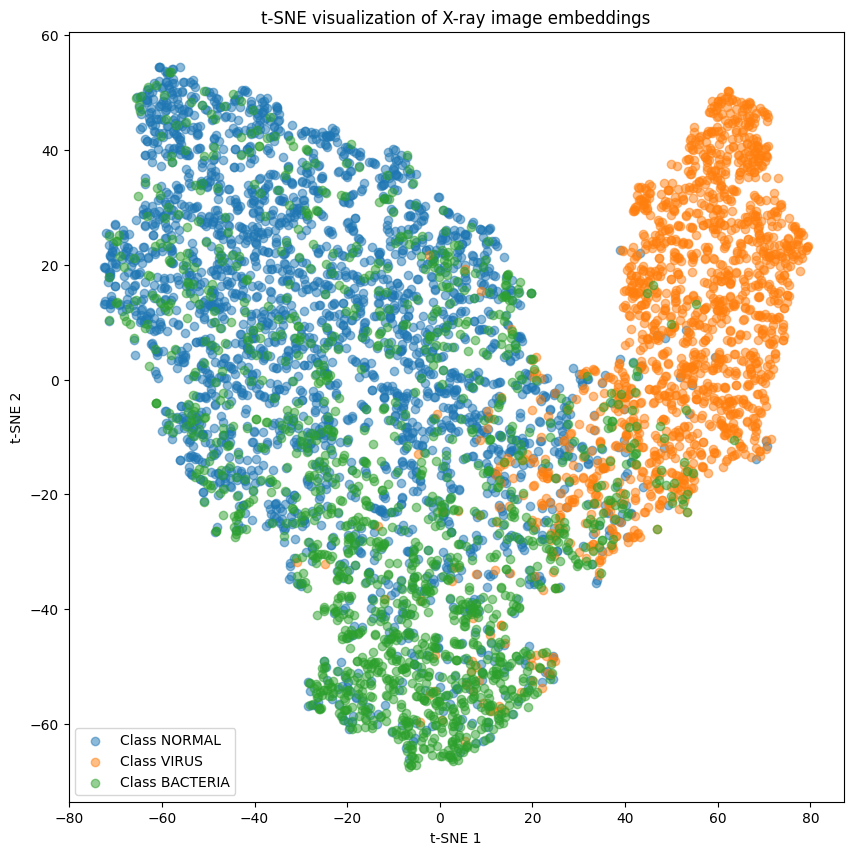

In [ ]:
# Convert one-hot encoded labels to integers
# for example: [0,0,1] will be 2
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

# Now safely combine the labels
all_labels = np.hstack([train_labels, test_labels])


all_embeddings = np.vstack([train_embeddings, test_embeddings])
tsne_visualiztion(all_embeddings, all_labels)

### Now let's visualize the binary model embeddings:

### Merge VIRUS and BACTERIA directories back to PNEUMONIA for binary classification:

In [ ]:
# Create PNEUMONIA directory from VIRUS and BACTERIA directories.
def merge_virus_bacteria(source_folder):
  virus_dir = os.path.join(source_folder, 'VIRUS')
  bacteria_dir = os.path.join(source_folder, 'BACTERIA')

  if not os.path.exists(virus_dir) or not  os.path.exists(bacteria_dir):
    print("VIRUS or BACTERIA directory does not exists - can't merge")
    return

  pneumonia_dir = os.path.join(source_folder, 'PNEUMONIA')
  os.makedirs(pneumonia_dir)

  def move_and_remove(src_dir):
      for filename in os.listdir(src_dir):
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(pneumonia_dir, filename)
        os.rename(src_path, dst_path)
      os.rmdir(src_dir)

  move_and_remove(virus_dir)
  move_and_remove(bacteria_dir)
  print("Files merged successfully!")

merge_virus_bacteria(train_dir)
merge_virus_bacteria(val_dir)
merge_virus_bacteria(test_dir)
class_mode = 'binary'
train_data, val_data, test_data = define_data()

Files merged successfully!
Files merged successfully!
Files merged successfully!
Found 5200 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Found 592 images belonging to 2 classes.


### Extract embedding model from the trained binary model:

* Very similar to the previous section, I will not add as much text.

In [ ]:
embedding_layer = binary_model.layers[-3]  # The Dense layer before Dropout
embedding_model = EmbeddingModel(inputs=binary_model.input, outputs=embedding_layer.output)

In [ ]:
train_embeddings, train_labels = embedding_model.predict(train_data)
test_embeddings, test_labels = embedding_model.predict(test_data)

37/37 [==============================] - 12s 309ms/step


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_embeddings, train_labels)

KNeighborsClassifier()

In [ ]:
test_predictions = knn_classifier.predict(test_embeddings)
knn_accuracy = accuracy_score(test_labels, test_predictions)
print(f'KNN Accuracy on test data: {knn_accuracy}')

KNN Accuracy on test data: 0.7804054054054054


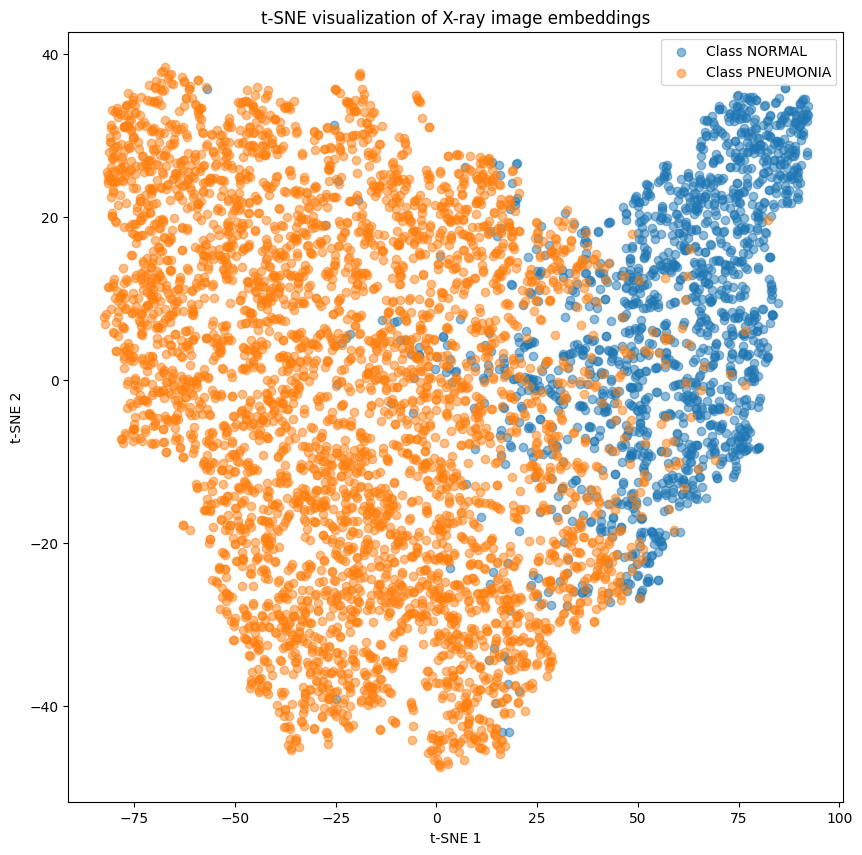

In [ ]:
all_embeddings = np.vstack([train_embeddings, test_embeddings])
all_labels = np.hstack([train_labels, test_labels])
tsne_visualiztion(all_embeddings, all_labels)



---



## Task 3 - In this task, you only have data for "healthy" images.  
### Try to identify "sick" individuals using Anomaly Detection methods.
#### The only Anomaly Detection method we have learned is Autoencoders.


### Prepare healthy images dataset for training the autoencoder:

In [ ]:
# Only use NORMAL images for training
normal_train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['NORMAL'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='input'  # Autoencoder uses input images as labels
)

normal_val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir,
    classes=['NORMAL'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='input'  # Autoencoder uses input images as labels
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode=None,  # We'll handle labels separately
    shuffle=False
)

Found 1333 images belonging to 1 classes.
Found 32 images belonging to 1 classes.
Found 592 images belonging to 2 classes.


### Building the Autoencoder:

In [ ]:
input_img = Input(shape=(img_height, img_width, 1))  # grayscale images

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Dropout(0.2)(x)  # Adding dropout for regularization

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.2)(x)  # Adding dropout for regularization
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 152, 152, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 152, 152, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 76, 76, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 76, 76, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 38, 38, 16)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 38, 38, 16)        0     

In [ ]:
autoencoder.load_weights('/content/drive/MyDrive/DeepLearning/autoencoder_weights.h5')

### Training the Autoencoder:

* I trained the model in 2 different runs, loading weights between each run.
* The first run was with ImageDataGenerator(rescale=1./255) and the second with train_datagen (flip, rotate, etc..)

In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
# Train the model with a maximum of 10 epochs
history = autoencoder.fit(
    normal_train_generator,
    epochs=10,
    validation_data=normal_val_generator,
    callbacks=[early_stopping]
)

Epoch 1/10
84/84 [==============================] - 159s 2s/step - loss: 0.0197 - val_loss: 0.0042
Epoch 2/10
84/84 [==============================] - 106s 1s/step - loss: 0.0048 - val_loss: 0.0030
Epoch 3/10
84/84 [==============================] - 111s 1s/step - loss: 0.0037 - val_loss: 0.0024
Epoch 4/10
84/84 [==============================] - 109s 1s/step - loss: 0.0032 - val_loss: 0.0021
Epoch 5/10
84/84 [==============================] - 109s 1s/step - loss: 0.0029 - val_loss: 0.0020
Epoch 6/10
84/84 [==============================] - 108s 1s/step - loss: 0.0028 - val_loss: 0.0019
Epoch 7/10
84/84 [==============================] - 112s 1s/step - loss: 0.0027 - val_loss: 0.0018
Epoch 8/10
84/84 [==============================] - 109s 1s/step - loss: 0.0026 - val_loss: 0.0018
Epoch 9/10
84/84 [==============================] - 111s 1s/step - loss: 0.0025 - val_loss: 0.0017
Epoch 10/10
84/84 [==============================] - 112s 1s/step - loss: 0.0025 - val_loss: 0.0017


In [ ]:
# Train the model with a maximum of 10 epochs
history = autoencoder.fit(
    normal_train_generator,
    epochs=10,
    validation_data=normal_val_generator,
    callbacks=[early_stopping]
)

Epoch 1/10
84/84 [==============================] - 39s 404ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 2/10
84/84 [==============================] - 27s 323ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 3/10
84/84 [==============================] - 25s 299ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4/10
84/84 [==============================] - 25s 303ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 5/10
84/84 [==============================] - 25s 299ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/10
84/84 [==============================] - 26s 313ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 7/10
84/84 [==============================] - 25s 300ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/10
84/84 [==============================] - 25s 300ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/10
84/84 [==============================] - 25s 293ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/10
84/84 [==============================] - 25s 300ms/step - loss: 0.0014 - val_lo

### Plot training & validation loss values:

* only for the first 10 epochs

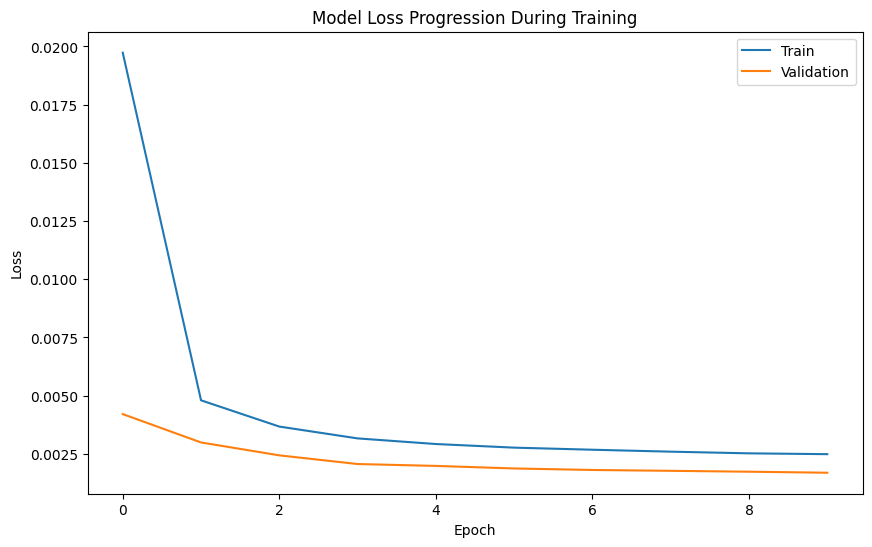

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### You can save the trained model weights:

In [ ]:
autoencoder.save_weights('/content/drive/MyDrive/DeepLearning/autoencoder_weights.h5')

### My first attempt to implement an anomaly detection system for normal/sick classification using an autoencoder was using a threshold. The system utilizes a threshold based on the reconstruction loss of the autoencoder. Images with a reconstruction loss exceeding the 5th percentile threshold calculated from the training data are classified as anomalies, potentially indicating pneumonia.

#### I tried diffrenet networks, thresholds and training epochs and this is the final result.

### Choosing a Threshold for Anomaly Detection:

In [ ]:
import sys

reconstruction_errors = []
num_batches = len(normal_train_generator)

for i, images in enumerate(normal_train_generator):
  images, _ = images
  if i >= num_batches:
      break  # Ensure we only pass through the training data once
  sys.stdout.write(f'{i+1}/{num_batches}   ')
  reconstructions = autoencoder.predict(images, verbose=0)

  mse = np.mean(np.square(images - reconstructions), axis=(1, 2, 3))
  reconstruction_errors.extend(mse)
print('\n')

threshold = np.percentile(reconstruction_errors, 95)
print("threshold value: ", threshold)

1/84   2/84   3/84   4/84   5/84   6/84   7/84   8/84   9/84   10/84   11/84   12/84   13/84   14/84   15/84   16/84   17/84   18/84   19/84   20/84   21/84   22/84   23/84   24/84   25/84   26/84   27/84   28/84   29/84   30/84   31/84   32/84   33/84   34/84   35/84   36/84   37/84   38/84   39/84   40/84   41/84   42/84   43/84   44/84   45/84   46/84   47/84   48/84   49/84   50/84   51/84   52/84   53/84   54/84   55/84   56/84   57/84   58/84   59/84   60/84   61/84   62/84   63/84   64/84   65/84   66/84   67/84   68/84   69/84   70/84   71/84   72/84   73/84   74/84   75/84   76/84   77/84   78/84   79/84   80/84   81/84   82/84   83/84   84/84   

threshold value:  0.0012943900190293786


### Here is the data distribution with the orange-lined threshold:

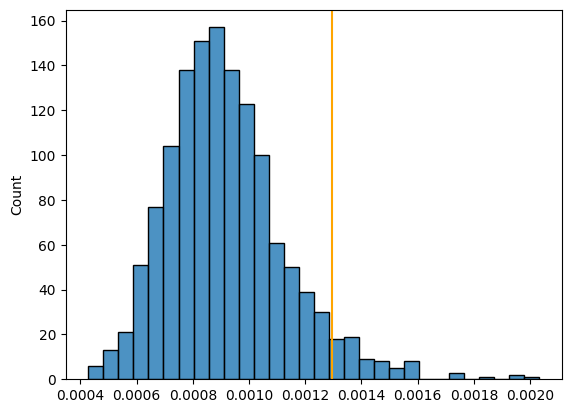

In [ ]:
import seaborn as sns

sns.histplot(reconstruction_errors, bins=30, alpha=0.8)
plt.axvline(x=threshold, color='orange')

### Evaluating the Model on the Test Set:

In [ ]:
from sklearn.metrics import classification_report

test_mse = []
test_filepaths = []

num_batches = len(test_generator)  # Total number of steps (batches of samples) to yield from generator before stopping.

for i in range(num_batches):
    test_images = next(test_generator)
    sys.stdout.write(f'{i+1}/{num_batches}   ')
    test_reconstructions = autoencoder.predict(test_images, verbose=0)
    batch_mse = np.mean(np.square(test_images - test_reconstructions), axis=(1, 2, 3))

    test_mse.extend(batch_mse)
    test_filepaths.extend(test_generator.filepaths[i * batch_size: (i + 1) * batch_size])
print('\n')

# Classify as 0 if MSE is below the threshold (NORMAL), else 1 (PNEUMONIA)
predictions = (np.array(test_mse) > threshold).astype(int)

# True labels: 0 for NORMAL, 1 for PNEUMONIA
true_labels = [0 if 'NORMAL' in path else 1 for path in test_filepaths]

print(classification_report(true_labels, predictions, target_names=['NORMAL', 'PNEUMONIA']))


1/37   2/37   3/37   4/37   5/37   6/37   7/37   8/37   9/37   10/37   11/37   12/37   13/37   14/37   15/37   16/37   17/37   18/37   19/37   20/37   21/37   22/37   23/37   24/37   25/37   26/37   27/37   28/37   29/37   30/37   31/37   32/37   33/37   34/37   35/37   36/37   37/37   

              precision    recall  f1-score   support

      NORMAL       0.19      0.24      0.21       218
   PNEUMONIA       0.46      0.38      0.41       374

    accuracy                           0.33       592
   macro avg       0.32      0.31      0.31       592
weighted avg       0.36      0.33      0.34       592



### Classifying a Single Image:

#### Example usage:
```
result = classify_image('/path/to/image.jpeg', autoencoder, threshold)
print(result)
```


In [ ]:
def classify_image(img_path, autoencoder, threshold):
    img = keras.utils.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
    img_array = keras.utils.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    reconstruction = autoencoder.predict(img_array)
    mse = np.mean(np.square(img_array - reconstruction))

    if mse <= threshold:
        return 'NORMAL'
    else:
        return 'PNEUMONIA'

### Since the initial anomaly detection approach based on reconstruction loss yielded unsatisfactory results, I explored an alternative method using K-Nearest Neighbors (KNN) on the encoded features extracted by the autoencoder. This decision stemmed from visualizing the encoded data.

### Interestingly, the visualization revealed a spatial separation between normal and pneumonia images. Normal images appeared clustered in the center of the data space, while pneumonia images formed a distinct cluster further away, potentially forming a circular pattern.

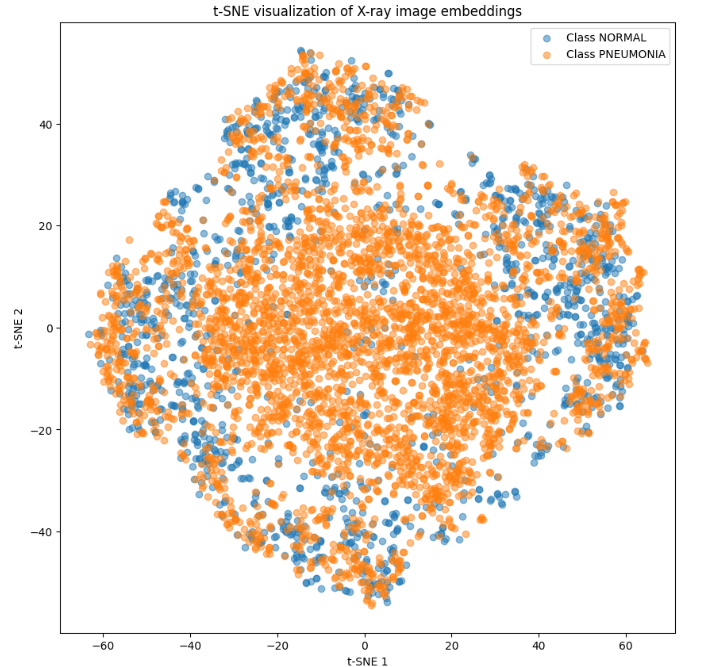

### After further training of the Autoencoder, the t-sne visualization was a bit different, as you will see in the next sections.

### Build the encoder model:

In [ ]:
encoder_model = EmbeddingModel(inputs=autoencoder.input, outputs=encoded)

### Get the input for the t-sne visualization and knn classifier:

In [ ]:
train_encodings, train_labels = embedding_model.predict(train_data)

325/325 [==============================] - 1799s 6s/step


### The features should be in one vector, hence we need to reshape the input:

In [ ]:
print("train_encodings original shape: ", train_encodings.shape)
print("train_labels shape: ", train_labels.shape)

# Reshape the encoded data to 2D
train_encodings = train_encodings.reshape(train_encodings.shape[0], -1)  # -1 flattens remaining dimensions
print("train_encodings Reshaped shape: ", train_encodings.shape)

train_encodings original shape:  (5200, 38, 38, 16)
train_labels shape:  (5200,)
train_encodings Reshaped shape:  (5200, 23104)


### Visualize the data with anomalies:

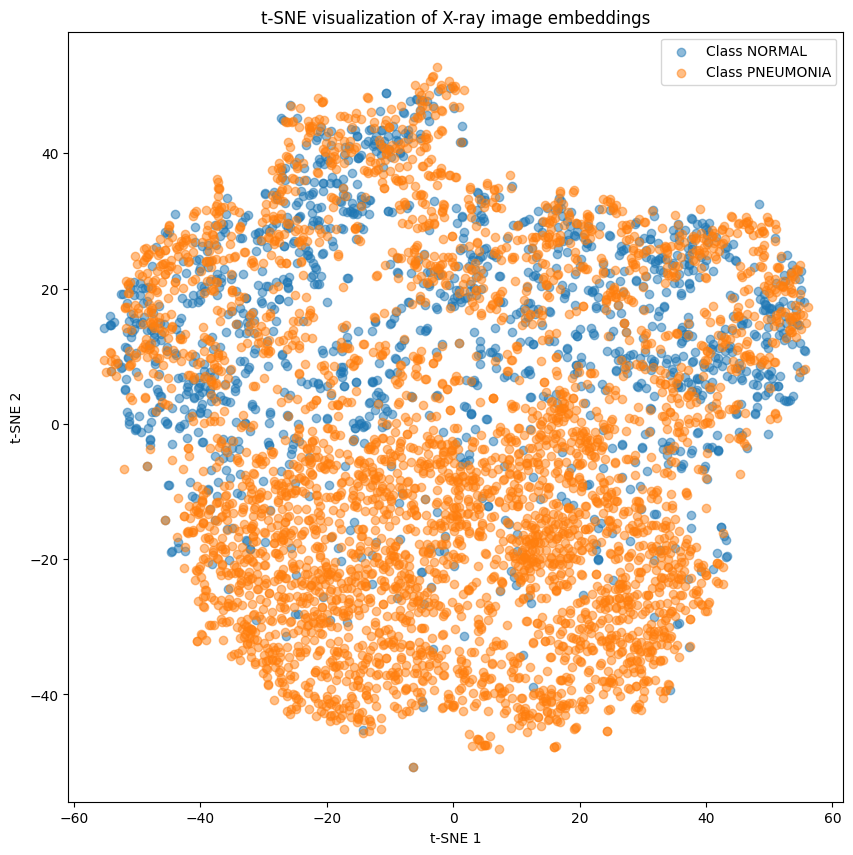

In [ ]:
tsne_visualiztion(train_encodings, train_labels)

### Setting the test input for the knn classifier:




In [ ]:
test_encodings, test_labels = embedding_model.predict(test_data)
test_encodings = test_encodings.reshape(test_encodings.shape[0], -1)

### Build and train the KNN model:

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(train_encodings, train_labels)

KNeighborsClassifier(n_neighbors=10)

### Evaluate the model:

In [ ]:
test_predictions = knn_classifier.predict(test_encodings)
knn_accuracy = accuracy_score(test_labels, test_predictions)
print(f'KNN Accuracy on test data: {knn_accuracy}')

KNN Accuracy on test data: 0.6570945945945946


### And the Classification report:

In [ ]:
print(classification_report(test_labels, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.94      0.07      0.14       218
   PNEUMONIA       0.65      1.00      0.79       374

    accuracy                           0.66       592
   macro avg       0.79      0.54      0.46       592
weighted avg       0.76      0.66      0.55       592



### As you can see, the results are much better!

### Now Let's see our Autoencoder at work!
#### Here is the before and after of n * len(classes) images:

In [ ]:
def get_images_by_label(data_dir, n):
  classes = get_classes(class_mode)
  images_by_label = {label: [] for label in classes}

  for label in classes:
    class_dir = os.path.join(data_dir, label)

    if not os.path.isdir(class_dir):
      raise ValueError('Directory does not exist: {}'.format(class_dir))

    # Ensure we don't request more files than exist
    all_files = os.listdir(class_dir)
    num_files_to_select = min(n, len(all_files))

    # Randomly select files
    files = np.random.choice(all_files, size=num_files_to_select, replace=False)

    for filename in files:
      image_path = os.path.join(class_dir, filename)
      image = keras.utils.load_img(image_path, target_size=(img_height, img_width), color_mode=color_mode)
      image = keras.utils.img_to_array(image)
      image /= 255.0  # Normalize to [0, 1] if your model expects this range
      images_by_label[label].append(image)

  return images_by_label


NORMAL:
1/1 [==============================] - 2s 2s/step


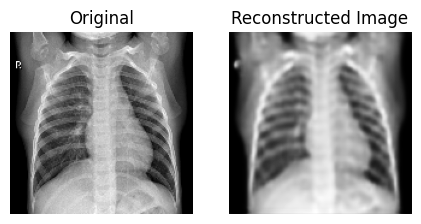

1/1 [==============================] - 0s 18ms/step


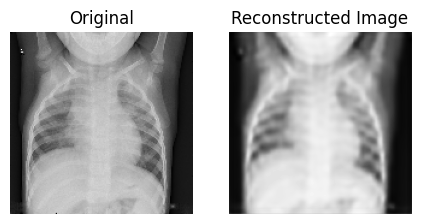


PNEUMONIA:
1/1 [==============================] - 0s 19ms/step


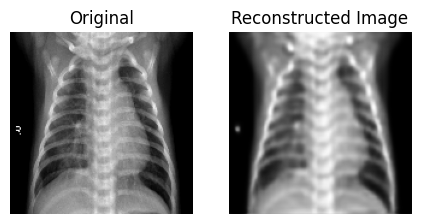

1/1 [==============================] - 0s 17ms/step


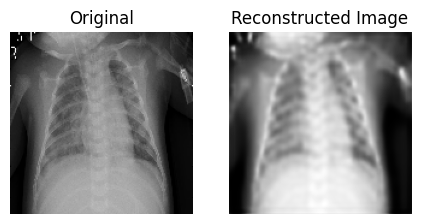

In [ ]:
n = 2
images_by_label = get_images_by_label(val_dir, 2)
classes = get_classes(class_mode)

for label, imgs in images_by_label.items():
  print(f'\n{label}:')
  for img in imgs:
    plt.figure(figsize=(8, 4))

    img = np.expand_dims(img, axis=0)  # make img a batch of 1
    reconstructed_img = autoencoder.predict(img)

    img = np.squeeze(img, axis=0)
    reconstructed_img = np.squeeze(reconstructed_img, axis=0)

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_img.squeeze(), cmap='gray')
    plt.title("Reconstructed Image")
    plt.axis('off')

    plt.show()



---



## Task 4 - Explainability:  
### Implement and analyze **one** of the explainability techniques you have learned during the course for the model trained in task 1a.  
### Discuss how this technique helps understand the model's decisions.

I will show **two** explainability techniques we have learned:
* Grad-CAM
* Heat maps by occlusion

another two explainability techniques we have learned are:
* Visualizing patches that maximizes activation.
* Synthesizing inputs that cause that unit to have high activation.

### Grad-CAM

### Heat maps by occlusion

#### The function, generate_heatmap, calculates the local importance of an image (img) using a provided model (model).

* Takes an image (img) and a model (model).
* Slides a window across the image, masking each region.
* Compares the model's prediction on the original and masked image.
* Creates a heatmap showing how much each region affects the prediction.

In [ ]:
def generate_heatmap(model, img, target_size=(img_height, img_width), occlusion_size=19):
  original_img = img.copy()
  heatmap = np.zeros((target_size[0], target_size[1]))

  for x in range(0, target_size[0], occlusion_size):
    for y in range(0, target_size[1], occlusion_size):
      occluded_img = img.copy()
      occluded_img[y:y+occlusion_size, x:x+occlusion_size, :] = 0

      original_pred = model.predict(np.expand_dims(original_img, axis=0), verbose=0)
      occluded_pred = model.predict(np.expand_dims(occluded_img, axis=0), verbose=0)
      # example prediction [[0.00082903]] (batch of 1)

      diff = original_pred - occluded_pred
      heatmap[y:y+occlusion_size, x:x+occlusion_size] = diff

  return heatmap

### To understand it a bit better we will overlay the heatmap over the original image.

In [ ]:
def overlay_heatmap(original_img, heatmap, alpha=0.5):
  # Normalize heatmap
  max_val = np.max(heatmap)
  normalized_heatmap = heatmap / max_val if max_val > 0 else heatmap

  # Apply colormap
  colormap = plt.cm.viridis
  heatmap_colored = colormap(normalized_heatmap)

  # Overlay heatmap on original image
  overlayed_img = (heatmap_colored[..., :3] * alpha + original_img * (1 - alpha)).clip(0, 1)

  return overlayed_img

### Now let's visualize it!

--------
NORMAL
--------


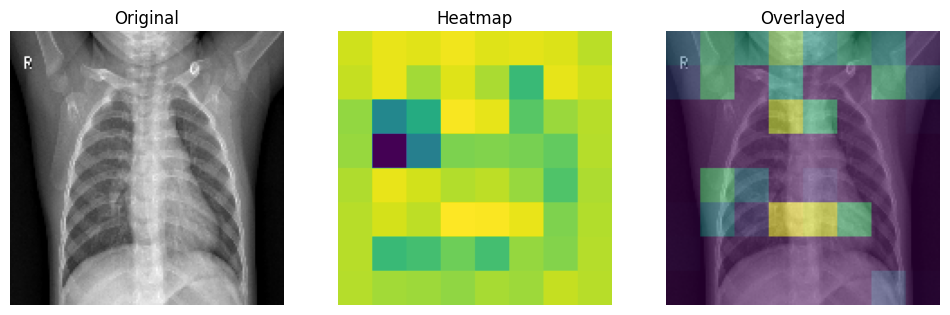

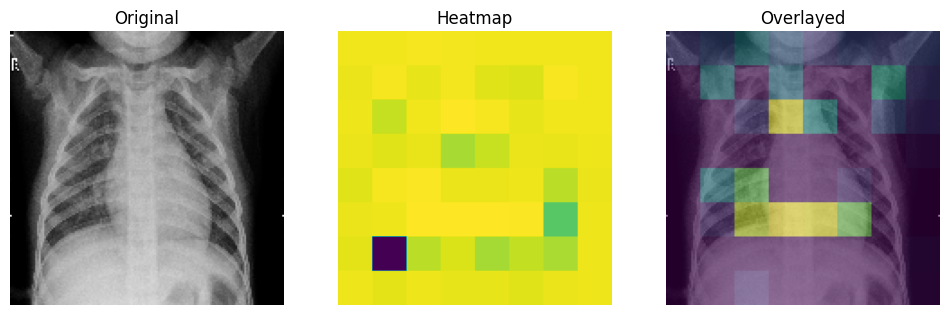

--------
PNEUMONIA
--------


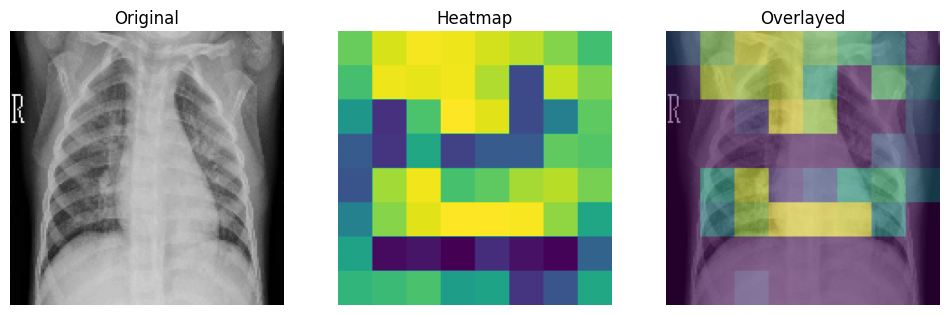

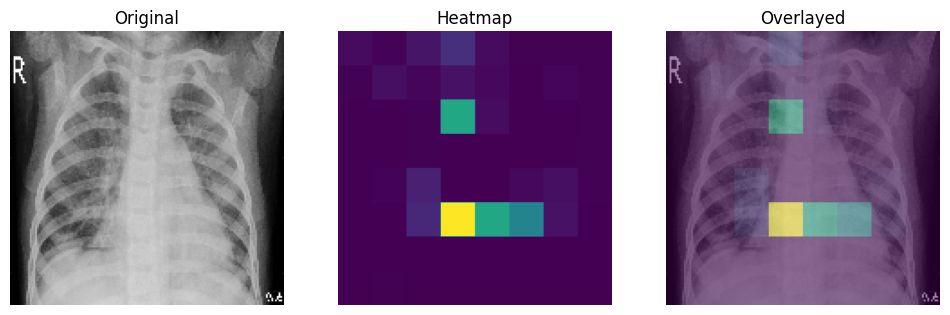

In [ ]:
n = 2
images_by_label = get_images_by_label(val_dir, 2)
classes = get_classes(class_mode)

for label in classes:
  print(f"{'-'*8}\n{label}\n{'-'*8}")
  for img in images_by_label[label]:
    # img.shape = (152, 152, 1)
    # heatmap.shape = (152, 152)
    # overlayed_img.shape (152, 152, 3)

    heatmap = generate_heatmap(binary_model, img)
    overlayed_img = overlay_heatmap(img, heatmap)

    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(img.squeeze(), cmap='gray')  # Assuming grayscale images, remove .squeeze() for RGB
    plt.title("Original")
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='viridis')
    plt.title("Heatmap")
    plt.axis('off')

    # Image with overlay
    plt.subplot(1, 3, 3)
    plt.imshow(overlayed_img)
    plt.title("Overlayed")
    plt.axis('off')

    plt.show()

### Heat maps by occlusion helps understand the model's decisions by identifing image areas crucial for the model's prediction.

### Grad-CAM

source: https://keras.io/examples/vision/grad_cam/

### Grad-CAM, short for Gradient-weighted Class Activation Mapping, is a technique for making convolutional neural networks (CNNs) more transparent by visualizing the areas of input images that are important for predictions for a specific class. The method works by identifying the convolutional layer(s) within the network that have the most influence on a particular class decision. Then, it uses the gradients of the target class (the class for which we want to visualize the network's focus) flowing into the selected convolutional layer to highlight the important regions in the image for making the prediction.

### Here's a brief overview of how Grad-CAM works:

1. **Forward Pass**: Run the image through the network to obtain the raw class scores before softmax (the logits).

2. **Compute Gradients:** Calculate the gradients of the target class (for which you want the visualization) with respect to the feature maps of a chosen convolutional layer. These gradients indicate how much each neuron's activity influences the class score.

3. **Pooling of Gradients:** Perform a global average pooling on the gradients across the width and height dimensions (for each feature map). This results in a set of neuron importance weights.

4. **Weighted Combination of Feature Maps:** Multiply each feature map by the corresponding neuron importance weight and then sum across the channels. This results in a single 2D heatmap where each value indicates how much each part of the image contributed to the target class.

5. **Heatmap Processing:** Apply a ReLU activation to the heatmap. This step ensures that only features with a positive influence on the class's confidence are visualized.

6. **Superimpose Heatmap:** Superimpose the heatmap onto the original image to see which areas are most important for the prediction.

In [ ]:
import matplotlib as mt

def make_gradcam_heatmap(img, model, last_conv_layer_name):
  # First, we create a model that maps the input image to the activations
  # of the last conv layer as well as the output predictions
  grad_model = tf.keras.models.Model(
      [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
  )

  # Then, we compute the gradient of the top predicted class for our input image
  # with respect to the activations of the last conv layer
  with tf.GradientTape() as tape:
      last_conv_layer_output, preds = grad_model(np.expand_dims(img, axis=0))
      class_channel = preds[:, 0] # ':' cause it's a batch, 0 cause it's binary

  # This is the gradient of the output predicted neuron with respect to the
  # output feature map of the last conv layer
  grads = tape.gradient(class_channel, last_conv_layer_output)

  # This is a vector where each entry is the mean intensity of the gradient
  # over a specific feature map channel
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the predicted class
  # then sum all the channels to obtain the heatmap class activation
  last_conv_layer_output = last_conv_layer_output[0]
  heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
  heatmap = tf.squeeze(heatmap)

  # For visualization purpose, we will also normalize the heatmap between 0 & 1
  # The tf.maximum(heatmap, 0) part ensures that all negative values in the
  # heatmap are set to 0.
  # This is effectively applying a ReLU activation, which outputs the input
  # value if it is positive and 0 otherwise.
  heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
  return heatmap.numpy()

In [ ]:
def superimpose_heatmap(img, heatmap, alpha=0.4):
  # Rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # Use jet colormap to colorize heatmap
  jet = mt.colormaps["jet"]

  # Use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # Create an image with RGB colorized heatmap
  jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = (jet_heatmap * alpha + img).clip(0, 1)

  return superimposed_img

--------
NORMAL
--------


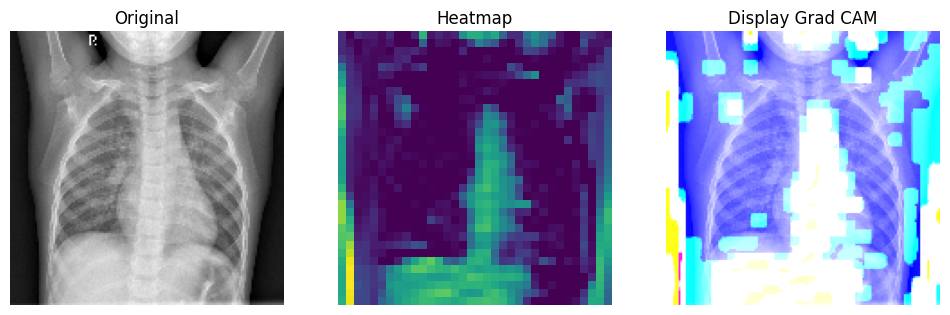

--------
PNEUMONIA
--------


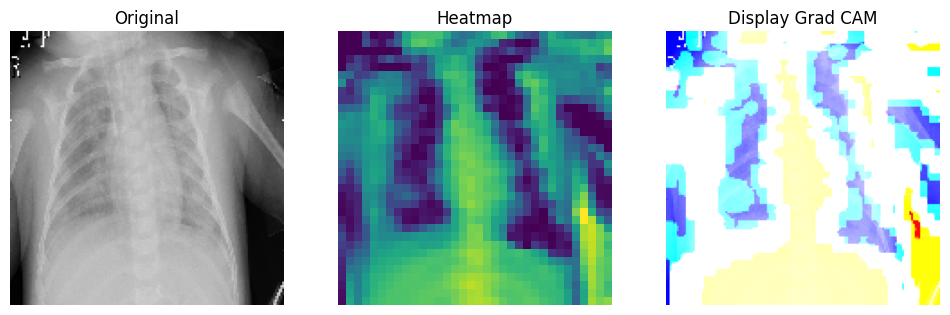

In [ ]:
n = 1
images_by_label = get_images_by_label(val_dir, n)
classes = get_classes(class_mode)
last_conv_layer_name = 'conv2d_3'

for label in classes:
  print(f"{'-'*8}\n{label}\n{'-'*8}")
  for img in images_by_label[label]:
    # img.shape = (152, 152, 1)
    # heatmap.shape = (34, 34)
    # overlayed_img.shape (152, 152, 3)

    heatmap = make_gradcam_heatmap(img, binary_model, last_conv_layer_name)
    superimposed_img = superimpose_heatmap(img, heatmap)

    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='viridis')
    plt.title("Heatmap")
    plt.axis('off')

    # Image with overlay
    plt.subplot(1, 3, 3)
    plt.imshow(superimposed_img)
    plt.title("Display Grad CAM")
    plt.axis('off')

    plt.show()

### Grad-CAM offers a powerful and accessible way to peek into the otherwise black-box nature of CNNs, enabling better understanding and trust in model decisions by highlighting what the model "sees" as important for its predictions.


---

